In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Dataset and split

Load our dataset, [Optical Recognition of Handwritten Digits Data Set](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).

In [ ]:
digits = datasets.load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = pd.DataFrame(digits["target"])

Let's take a peek.

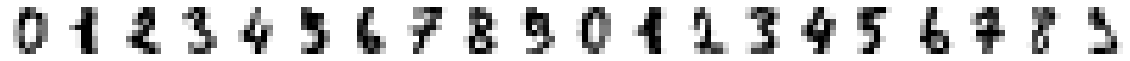

In [13]:
_, axes = plt.subplots(nrows=1, ncols=20, figsize=(20, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

50/50 split to increase difficulty.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=128
)

# Construct models

In [5]:
models = {}

models["SVC"] = SVC()
models["MLP"] = MLPClassifier()
models["RandomForest"] = RandomForestClassifier()
models["DecisionTree"] = DecisionTreeClassifier()
models["KNN"] = KNeighborsClassifier()

# Train and test

In [6]:
predictions = {}

for name, model in models.items():
    clf = model
    clf.fit(X_train, y_train.values.ravel())
    y_test_pred = clf.predict(X_test).tolist()

    predictions[name] = y_test_pred

# Export results for reporting

In [7]:
results = {
    "X_test": X_test.tolist(),
    "y_test": y_test.to_numpy().flatten().tolist(),
    "id_test": y_test.index.tolist(),
    "predictions": predictions,
}

with open("results.json", "w") as f:
    json.dump(results, f)